
# Hot Hand Case Study Analysis




In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pyrsm as rsm

In [3]:
# Load datasets
nba_pgdata = pd.read_parquet('nba_pgdata.parquet')
basketball_relationships = pd.read_parquet('BasketballRelationships.parquet')
baseball_relationships = pd.read_parquet('BaseballRelationships.parquet')

# Display first few rows of each dataset
nba_pgdata.head(), basketball_relationships.head(), baseball_relationships.head()


(          Player    Salary  Age        FG         RB       AST       STL  \
 0     A.J. Price    885.12   26  2.824561   2.000000  3.596491  0.578947   
 1   Aaron Brooks   3250.00   28  2.698113   1.509434  2.150943  0.566038   
 2  Al Harrington   6687.40   32  2.000000   2.700000  1.000000  0.400000   
 3     Al Horford  12000.00   26  7.783784  10.229730  3.243243  1.054054   
 4   Al Jefferson  15000.00   28  7.833333   9.230769  2.102564  1.025641   
 
         BLK        PTS  
 0  0.052632   7.736842  
 1  0.188679   7.094340  
 2  0.100000   5.100000  
 3  1.054054  17.418919  
 4  1.141026  17.833333  ,
    attempts  percentage  points
 0       905    0.438674    1057
 1      1318    0.484067    1560
 2       638    0.445141     705
 3       474    0.474684     555
 4      1489    0.449295    1920,
    atbats  hits       avg
 0     384    97  0.252604
 1     296    84  0.283784
 2     334    94  0.281437
 3     626   176  0.281150
 4     558   130  0.232975)


## Data Visualization



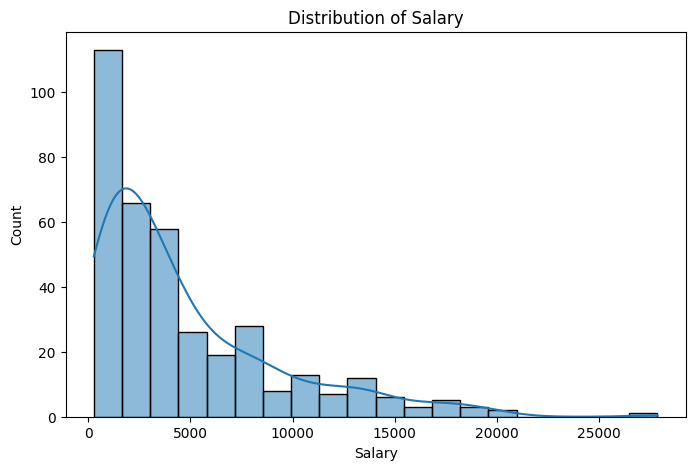

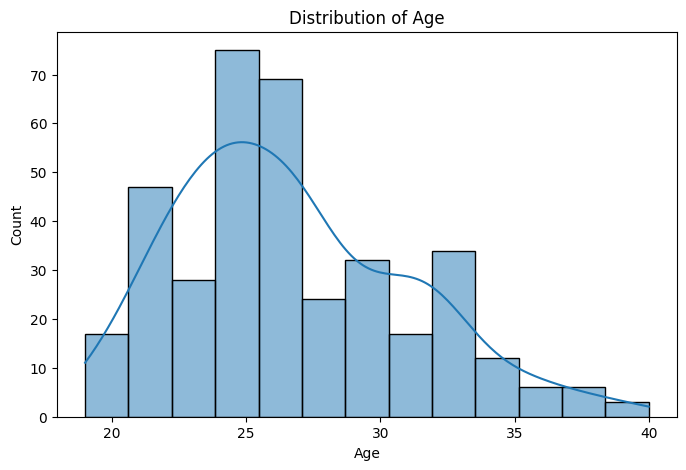

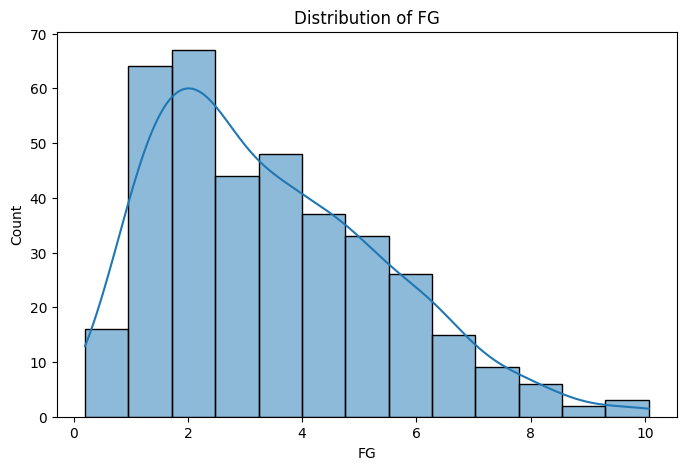

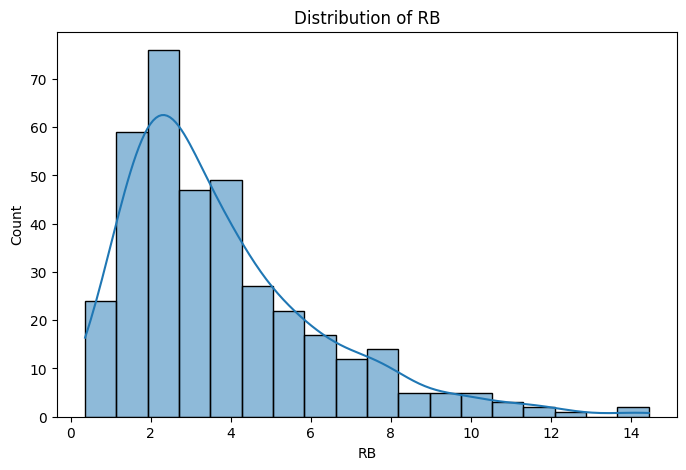

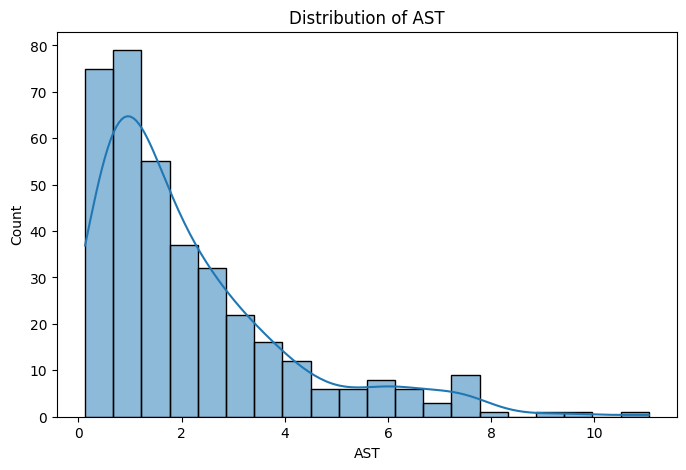

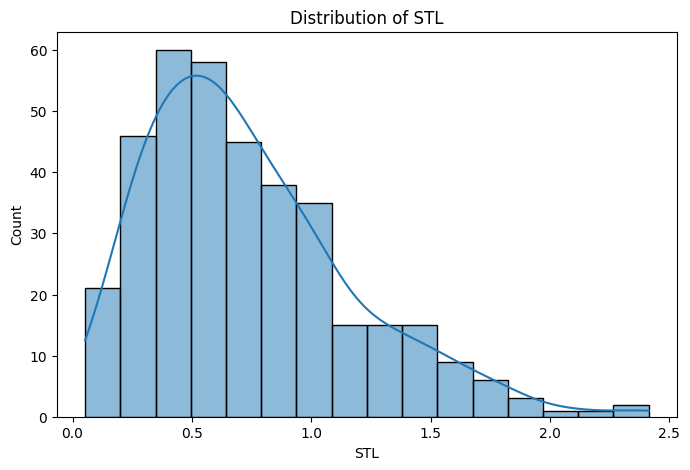

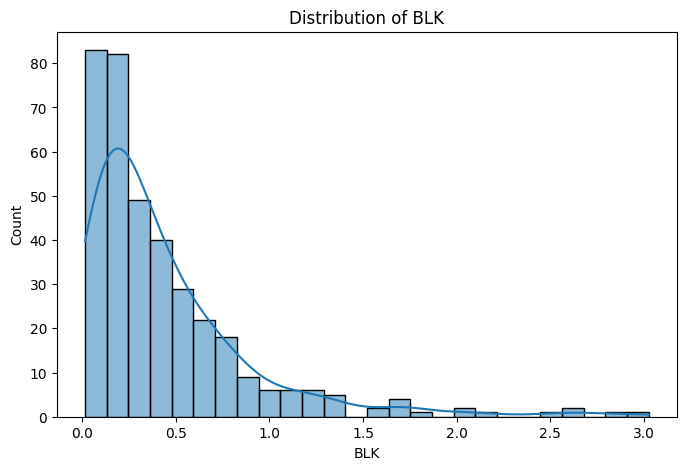

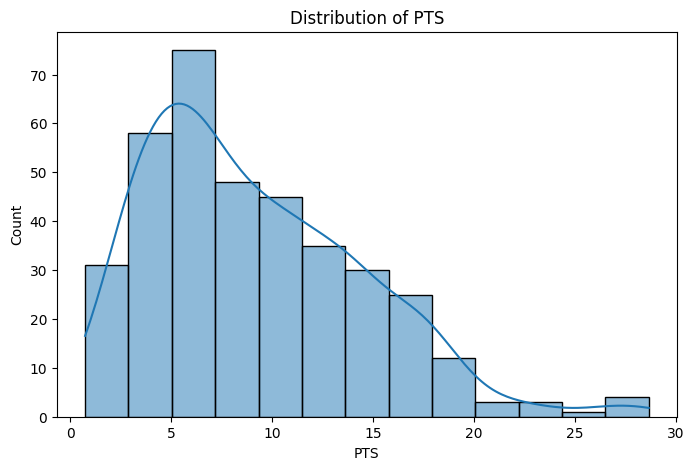

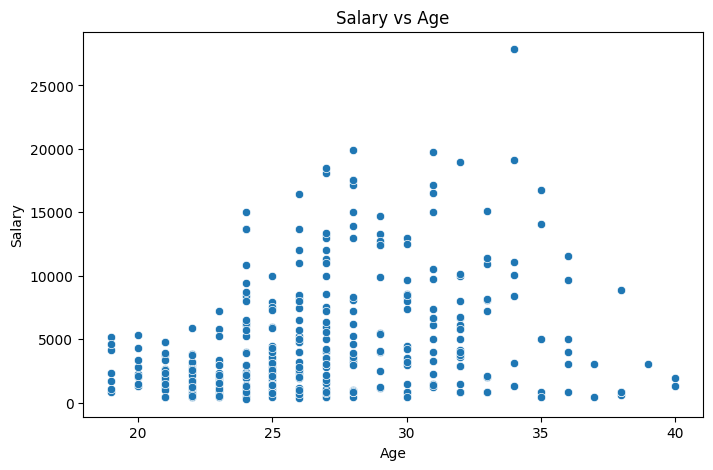

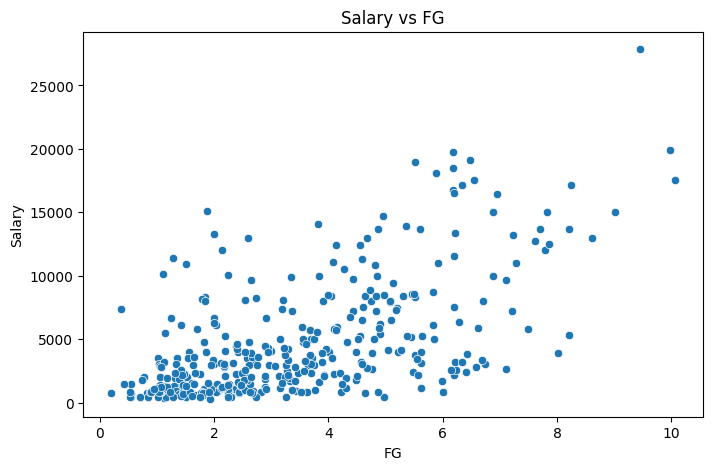

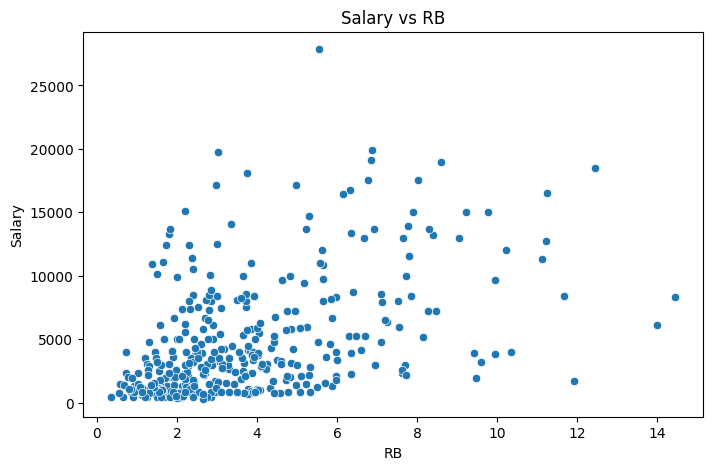

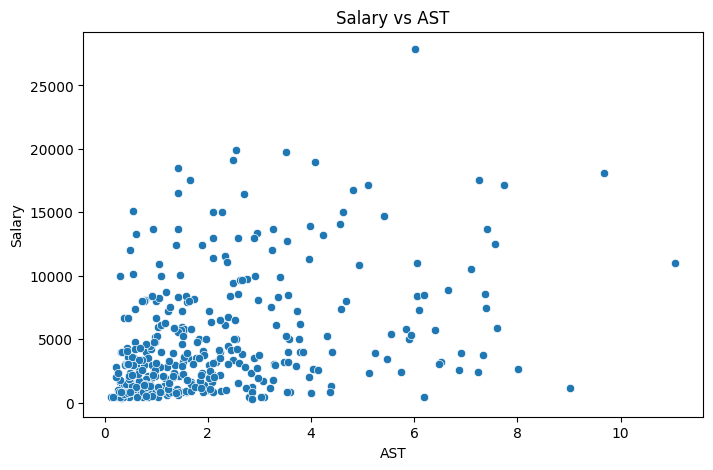

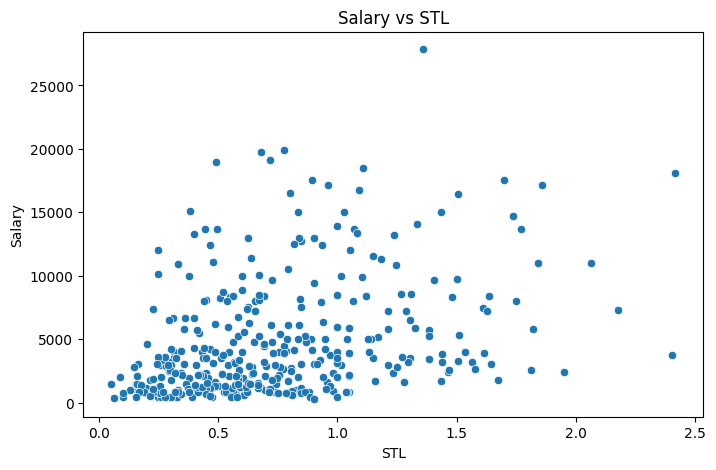

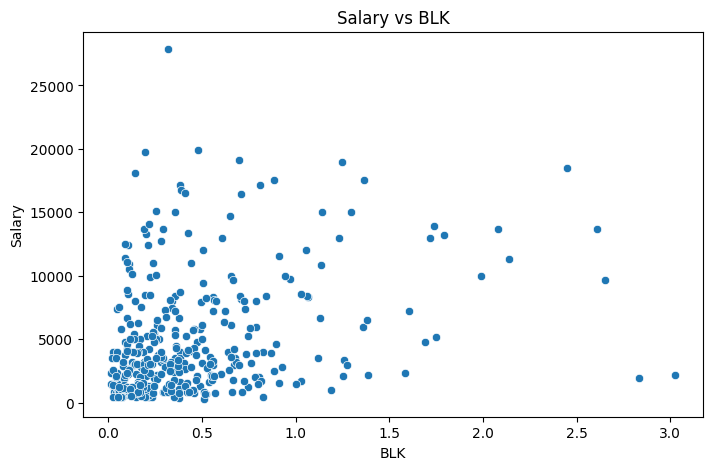

In [4]:
# Define columns to visualize
columns_to_visualize = ['Salary', 'Age', 'FG', 'RB', 'AST', 'STL', 'BLK', 'PTS']

# Create histograms for each column
for col in columns_to_visualize:
    plt.figure(figsize=(8, 5))
    sns.histplot(nba_pgdata[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Create scatter plots of Salary versus each predictor
for col in ['Age', 'FG', 'RB', 'AST', 'STL', 'BLK']:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=nba_pgdata[col], y=nba_pgdata['Salary'])
    plt.title(f'Salary vs {col}')
    plt.xlabel(col)
    plt.ylabel('Salary')
    plt.show()



## Regression Analysis



Regression A

In [5]:
# Alex Code:
reg = rsm.regress({'Salary': nba_pgdata}, rvar='Salary', evar=['Age', 'FG', 'RB', 'AST', 'STL', 'BLK'])
reg.summary()

Linear regression (OLS)
Data                 : Salary
Response variable    : Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK
Null hyp.: the effect of x on Salary is zero
Alt. hyp.: the effect of x on Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept    -8724.667   1131.833   -7.708  < .001  ***
Age            312.092     39.520    7.897  < .001  ***
FG            1156.982    153.881    7.519  < .001  ***
RB             223.312    117.004    1.909   0.057    .
AST            280.498    146.504    1.915   0.056    .
STL          -1064.070    613.248   -1.735   0.084    .
BLK           1071.100    517.030    2.072   0.039    *

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.492, Adjusted R-squared: 0.484
F-statistic: 58.632 df(6, 363), p.value < 0.001
Nr obs: 370


With a significance level of 0.05 Age, FG, BLK, are the most significant predictors. RB and AST are marginally significant. STL is not significant. 

Age (312.092): For each additional year in a player’s age, their salary is expected to increase by approximately 312.092 (in thousands of dollars), holding all other variables constant.

FG (1156.982): For each unit increase in field goals, salary is expected to increase by approximately 1156.982, holding other variables constant. This has the largest coefficient among the predictors, indicating a strong impact.

BLK (1071.100): Each additional block is associated with an increase in salary by about 1071.100, which is significant.

The coefficient values represent the expected change in the dependent variable (Salary) for a one-unit increase in the predictor, holding all other variables constant. For example:

- An increase of one unit in FG is associated with an increase of approximately 1156.982 in Salary.

- The coefficient for Age suggests that each additional year is associated with an increase in salary, likely reflecting experience or seniority.

Field Goals (FG) is the most impactful predictor due to its high coefficient and strong statistical significance (p < 0.001). This suggests that scoring ability is a major determinant of salary in this dataset.

R-squared (0.492): The R-squared value of 0.492 indicates that approximately 49.2% of the variance in Salary can be explained by the predictors in the model.

Interpretation: This is a moderate R-squared value, suggesting that while the model explains a substantial portion of the salary variation, there is still a significant portion (50.8%) unexplained by the current predictors. This implies there may be other influential factors not included in the model that could further explain salary variation.

Regression B

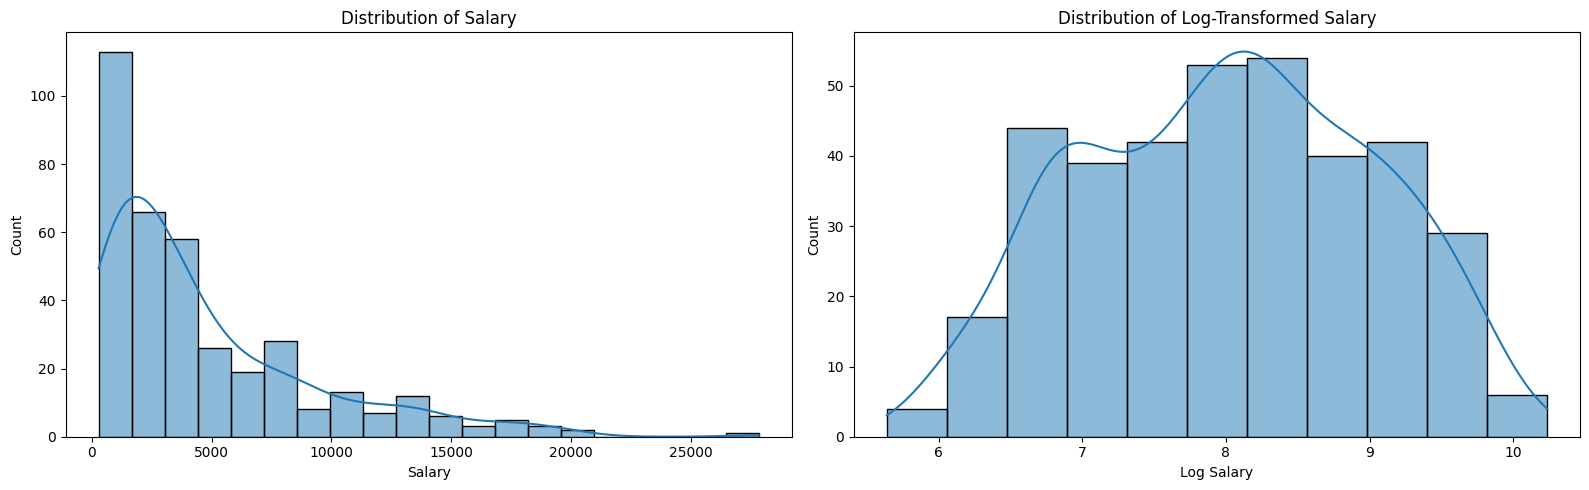

In [6]:
nba_pgdata['log_Salary'] = np.log(nba_pgdata['Salary'])

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(nba_pgdata['Salary'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of Salary')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Count')

sns.histplot(nba_pgdata['log_Salary'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Log-Transformed Salary')
axes[1].set_xlabel('Log Salary')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [7]:
reg = rsm.regress({'Log_Salary': nba_pgdata}, rvar='log_Salary', evar=['Age', 'FG', 'RB', 'AST', 'STL', 'BLK'])
reg.summary()

Linear regression (OLS)
Data                 : Log_Salary
Response variable    : log_Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept        5.302      0.255   20.803  < .001  ***
Age              0.058      0.009    6.487  < .001  ***
FG               0.208      0.035    5.994  < .001  ***
RB               0.067      0.026    2.533   0.012    *
AST              0.046      0.033    1.403   0.162     
STL              0.002      0.138    0.013    0.99     
BLK              0.210      0.116    1.807   0.072    .

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.455, Adjusted R-squared: 0.446
F-statistic: 50.599 df(6, 363), p.value < 0.001
Nr obs: 370


At a significance level of 0.05, Age and FG are still the most significant predictors along with RB (p-vaue 0.012). BLK is not longer as significant.

The coefficients are now a measure of how they affect the logarithm of Salary. For example for each increase in Age units, the logarithm of salary is increased by 0.058.

In [8]:
#Srujith Code

# Initial regression without PTS
from statsmodels.formula.api import ols

# Regression model
reg_model_a = ols('Salary ~ Age + FG + RB + AST + STL + BLK', data=nba_pgdata).fit()
print("Regression Model A Summary:")
print(reg_model_a.summary())

# Transform Salary using log and run regression again
nba_pgdata['log_Salary'] = np.log(nba_pgdata['Salary'])
reg_model_b = ols('log_Salary ~ Age + FG + RB + AST + STL + BLK', data=nba_pgdata).fit()
print("Regression Model B Summary (log-transformed Salary):")
print(reg_model_b.summary())

# Adding PTS to the log Salary model
reg_model_c = ols('log_Salary ~ Age + FG + RB + AST + STL + BLK + PTS', data=nba_pgdata).fit()
print("Regression Model C Summary (log Salary with PTS):")
print(reg_model_c.summary())

# Using standardized coefficients
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nba_pgdata[['log_Salary', 'Age', 'RB', 'AST', 'STL', 'BLK', 'PTS']])
scaled_df = pd.DataFrame(scaled_data, columns=['log_Salary', 'Age', 'RB', 'AST', 'STL', 'BLK', 'PTS'])
reg_model_d = ols('log_Salary ~ Age + RB + AST + STL + BLK + PTS', data=scaled_df).fit()
print("Regression Model D Summary (Standardized Coefficients):")
print(reg_model_d.summary())


Regression Model A Summary:
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     58.63
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.59e-50
Time:                        12:33:50   Log-Likelihood:                -3517.9
No. Observations:                 370   AIC:                             7050.
Df Residuals:                     363   BIC:                             7077.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8724.6669   

### Regression C

In [9]:
reg = rsm.regress({'Log_Salary': nba_pgdata}, rvar='log_Salary', evar=['Age', 'FG', 'RB', 'AST', 'STL', 'BLK','PTS'])
reg.summary()

Linear regression (OLS)
Data                 : Log_Salary
Response variable    : log_Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept        5.297      0.253   20.944  < .001  ***
Age              0.058      0.009    6.524  < .001  ***
FG              -0.117      0.130   -0.901   0.368     
RB               0.083      0.027    3.081   0.002   **
AST              0.044      0.033    1.347   0.179     
STL             -0.052      0.139   -0.378   0.706     
BLK              0.251      0.117    2.153   0.032    *
PTS              0.120      0.046    2.592    0.01   **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.465, Adjusted R-squared: 0.455
F-statistic: 45.013 df(7, 362), p.value < 0.001
Nr obs: 370


Age is the most significant indicator with a significance level of 0.001. PTS and RB are the next most significant followed by BLK. STL,AST and FG are not significant in the prediction of log salary.

The introduction of PTS as a predictor variable increases the R-squared rating from 0.455 to 0.465, indicating an improvement in the models explanatory power.

The introduction of PTS also reduces the reliance of FG in the linear regression model. This could indicate a strong corelation between PTS and FG.



### Regression D

In [10]:
from sklearn.preprocessing import StandardScaler
df = nba_pgdata.copy()
df[['log_Salary', 'Age', 'RB', 'AST', 'STL', 'BLK', 'PTS']] = StandardScaler().fit_transform(df[['log_Salary', 'Age', 'RB','AST', 'STL', 'BLK', 'PTS']])

reg = rsm.regress({'Log_Salary': df}, rvar='log_Salary', evar=['Age', 'RB', 'AST', 'STL', 'BLK','PTS'])
reg.summary()

Linear regression (OLS)
Data                 : Log_Salary
Response variable    : log_Salary
Explanatory variables: Age, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept       -0.000      0.038   -0.000     1.0     
Age              0.254      0.039    6.544  < .001  ***
RB               0.185      0.063    2.953   0.003   **
AST              0.079      0.062    1.266   0.206     
STL             -0.018      0.060   -0.301   0.763     
BLK              0.111      0.054    2.045   0.042    *
PTS              0.428      0.066    6.513  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.464, Adjusted R-squared: 0.455
F-statistic: 52.407 df(6, 363), p.value < 0.001
Nr obs: 370


Using standardized coefficients in a regression model changes how the results are interpreted, as it scales all variables to have a mean of 0 and a standard deviation of 1 before running the regression.

Unstandardized coefficients represent the expected change in Log_Salary for a one-unit increase in the predictor variable, holding all other predictors constant whereas standardized coefficients focus purely on the relative strength of the predictors, independent of their original units or scales. This is particularly useful when variables are measured on very different scales.

Using standardized coefficients we understand that PTS has the greatest affect on log salary with a coefficient of 0.428, followed by age with a coefficient of 0.254. RB and BLK also have a statistically significant affect on log sales whereas STL and AST do not have a statistically significant affect on log salary.


## Hot Hand Hypothesis Testing
We will explore the hot hand concept by analyzing conditional probabilities and runs.


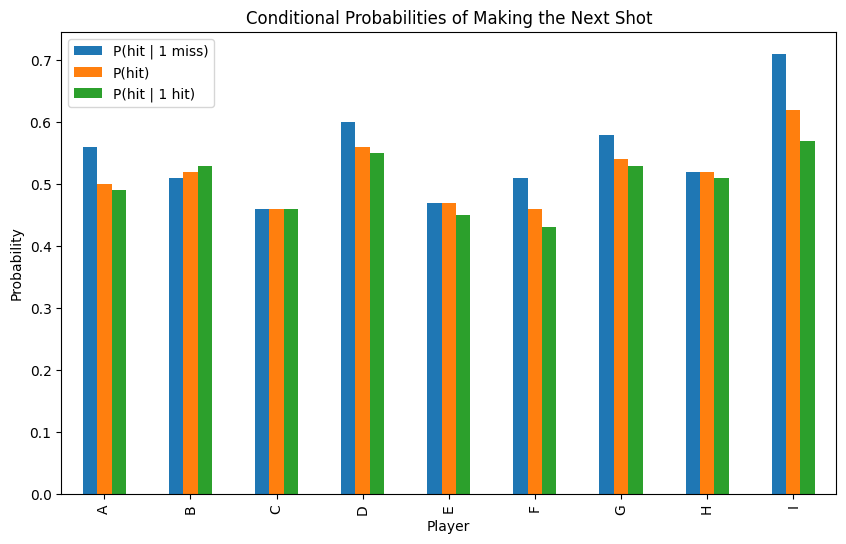

,Player,P(hit | 1 miss),P(hit),P(hit | 1 hit),Difference
0,A,0.56,0.50,0.49,-0.07
1,B,0.51,0.52,0.53,0.02
2,C,0.46,0.46,0.46,0.00
3,D,0.60,0.56,0.55,-0.05
4,E,0.47,0.47,0.45,-0.02
5,F,0.51,0.46,0.43,-0.08
6,G,0.58,0.54,0.53,-0.05
7,H,0.52,0.52,0.51,-0.01
8,I,0.71,0.62,0.57,-0.14


In [11]:

# Conditional probabilities provided in the case study
conditional_probs = pd.DataFrame({
    'Player': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'P(hit | 1 miss)': [0.56, 0.51, 0.46, 0.60, 0.47, 0.51, 0.58, 0.52, 0.71],
    'P(hit)': [0.50, 0.52, 0.46, 0.56, 0.47, 0.46, 0.54, 0.52, 0.62],
    'P(hit | 1 hit)': [0.49, 0.53, 0.46, 0.55, 0.45, 0.43, 0.53, 0.51, 0.57]
})

# Visualize conditional probabilities
conditional_probs.plot(x='Player', kind='bar', figsize=(10, 6))
plt.title('Conditional Probabilities of Making the Next Shot')
plt.ylabel('Probability')
plt.show()

# Interpret which players exhibit hot hand characteristics
conditional_probs['Difference'] = conditional_probs['P(hit | 1 hit)'] - conditional_probs['P(hit | 1 miss)']
conditional_probs



### Interpretation of Conditional Probabilities
- **Hot Hand Evidence**: Players with a positive difference in "P(hit | 1 hit) - P(hit | 1 miss)" might exhibit a hot hand. For 
  example, Player I has a noticeable difference, suggesting a possible hot hand effect.
- **General Findings**: Most players show little difference, indicating weak or no evidence for a hot hand across the sample. This 
  supports the theory that the hot hand effect may be psychological rather than statistically consistent.


   Player  Total Shots  Actual Runs  Expected Runs  Std Dev of Runs   Z-Score
0    0.50          248          128       125.0000         7.874008  0.381000
1    0.52          884          431       442.2928        14.866050 -0.759637
2    0.46          419          203       209.1592        10.234535 -0.601806
3    0.56          339          172       168.0592         9.205022  0.428114
4    0.47          272          134       136.5104         8.246158 -0.304433
5    0.46          451          245       225.0568        10.618163  1.878216
6    0.54          433          227       216.1144        10.404113  1.046279
7    0.52          351          176       176.2192         9.367485 -0.023400
8    0.62          403          220       190.8936        10.020765  2.904609


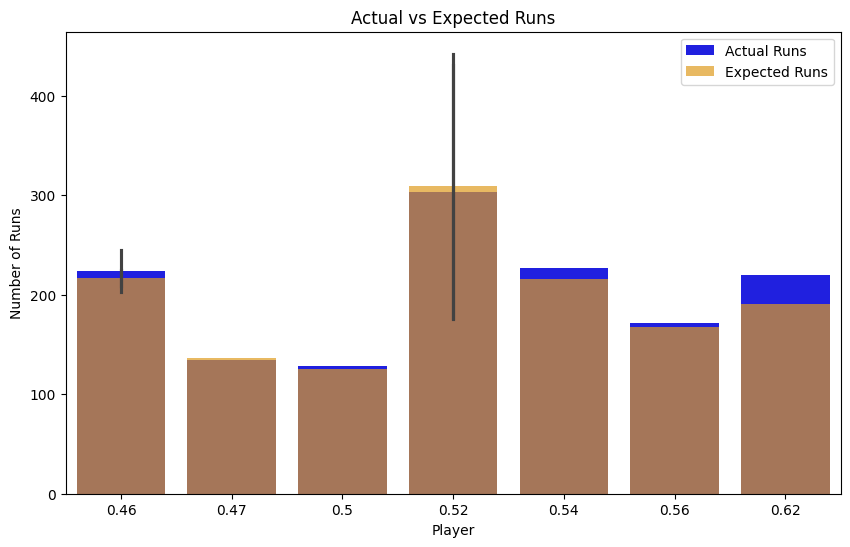

/var/folders/d2/ct38bz350dq_ht12tbjcm4m80000gn/T/ipykernel_62615/1291517795.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Z-Score', data=streaks_df, palette='viridis')


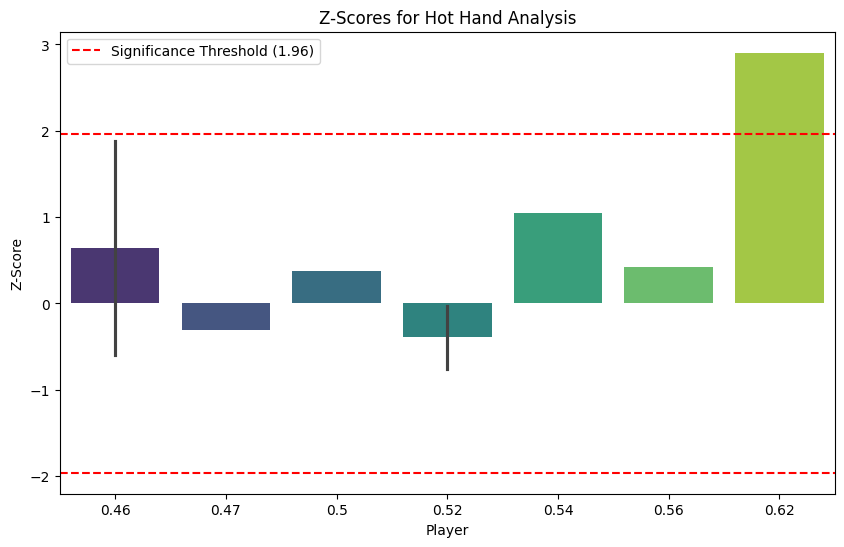

/var/folders/d2/ct38bz350dq_ht12tbjcm4m80000gn/T/ipykernel_62615/1291517795.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Std Dev of Runs', data=streaks_df, palette='coolwarm')


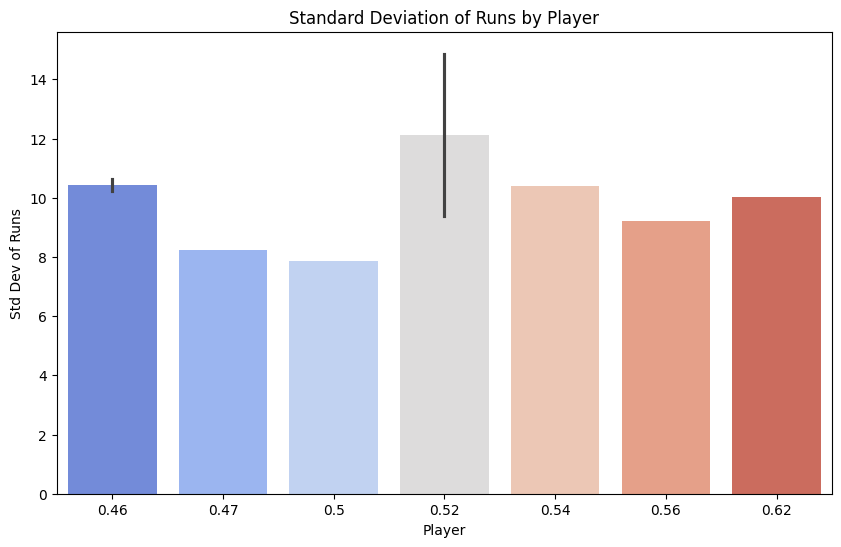

In [13]:
# strak analysis
# Define player data
players = ['Player A', 'Player B', 'Player C', 'Player D', 'Player E', 'Player F', 'Player G', 'Player H', 'Player I']
p_hit = [0.50, 0.52, 0.46, 0.56, 0.47, 0.46, 0.54, 0.52, 0.62]  # Probability of a hit
num_shots = [248, 884, 419, 339, 272, 451, 433, 351, 403]       # Total number of shots
actual_runs = [128, 431, 203, 172, 134, 245, 227, 176, 220]     # Observed number of runs

# Function to calculate expected number of runs and standard deviation
def calculate_runs_stats(p, n):
    # Expected number of runs
    expected_runs = 1 + 2 * n * p * (1 - p)
    # Variance of runs
    variance_runs = 2 * n * (p * (1 - p)) * (1 - 2 * p * (1 - p))
    std_dev_runs = np.sqrt(variance_runs) if variance_runs > 0 else 0
    return expected_runs, std_dev_runs

# Calculate stats for each player
results = []
for p, n, actual in zip(p_hit, num_shots, actual_runs):
    expected, std_dev = calculate_runs_stats(p, n)
    z_score = (actual - expected) / std_dev if std_dev > 0 else np.nan
    results.append({
        'Player': p,
        'Total Shots': n,
        'Actual Runs': actual,
        'Expected Runs': expected,
        'Std Dev of Runs': std_dev,
        'Z-Score': z_score
    })

# Convert results to DataFrame
streaks_df = pd.DataFrame(results)

# Display the DataFrame
print(streaks_df)

# Plot 1: Actual vs Expected Runs
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='Actual Runs', data=streaks_df, color='blue', label='Actual Runs')
sns.barplot(x='Player', y='Expected Runs', data=streaks_df, color='orange', alpha=0.7, label='Expected Runs')
plt.title('Actual vs Expected Runs')
plt.ylabel('Number of Runs')
plt.xlabel('Player')
plt.legend()
plt.show()

# Plot 2: Z-Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='Z-Score', data=streaks_df, palette='viridis')
plt.axhline(1.96, color='red', linestyle='--', label='Significance Threshold (1.96)')
plt.axhline(-1.96, color='red', linestyle='--')
plt.title('Z-Scores for Hot Hand Analysis')
plt.ylabel('Z-Score')
plt.xlabel('Player')
plt.legend()
plt.show()

# Plot 3: Standard Deviation of Runs
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='Std Dev of Runs', data=streaks_df, palette='coolwarm')
plt.title('Standard Deviation of Runs by Player')
plt.ylabel('Std Dev of Runs')
plt.xlabel('Player')
plt.show()


### Interpretation of Streaks Analysis
- **Expected vs. Actual Runs**: Players with fewer actual runs than expected might exhibit streakiness. For instance, if Player A's actual runs are significantly lower than expected, this suggests possible streaky behavior.
- **Z-Scores**: Z-scores outside ±1.96 indicate significant deviations from randomness. Players with such scores may show evidence of streakiness or the hot hand effect.
- **General Findings**: Most players have Z-scores close to 0, indicating that their shooting patterns align with randomness, providing little evidence for the hot hand hypothesis.
